In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def load_pickle_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
train_data = load_pickle_data("Train_features.pkl")
val_data = load_pickle_data("Val_features.pkl")
test_data = load_pickle_data("Test_features.pkl")

# Pre-processing

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
def extract_features_labels(data):
    X_list = []
    
    for item in data:
        # STFT: Lấy mean, variance, max
        stft_mean = np.mean(item['stft'], axis=1)
        stft_var = np.var(item['stft'], axis=1)
        stft_max = np.max(item['stft'], axis=1)

        # MFCC: Chỉ lấy mean theo trục thời gian
        mfcc_mean = np.mean(item['mfcc'], axis=1)
        mfcc_delta_mean = np.mean(item['mfcc_delta'], axis=1)
        mfcc_delta2_mean = np.mean(item['mfcc_delta2'], axis=1)

        # Gộp tất cả các đặc trưng thành vector đầu vào
        feature_vector = np.concatenate([stft_mean, stft_var, stft_max, mfcc_mean, mfcc_delta_mean, mfcc_delta2_mean])
        X_list.append(feature_vector)

    y = np.array([item['category'] for item in data])

    # Tạo tên cột đúng với số lượng đặc trưng
    num_stft = stft_mean.shape[0]  # 257
    num_mfcc = mfcc_mean.shape[0]  # 60

    feature_columns = (
        [f"stft_mean_{i}" for i in range(num_stft)] +
        [f"stft_var_{i}" for i in range(num_stft)] +
        [f"stft_max_{i}" for i in range(num_stft)] +
        [f"mfcc_mean_{i}" for i in range(num_mfcc)] +
        [f"mfcc_delta_mean_{i}" for i in range(num_mfcc)] +
        [f"mfcc_delta2_mean_{i}" for i in range(num_mfcc)]
    )

    return pd.DataFrame(X_list, columns=feature_columns), y

# Trích xuất đặc trưng
X_train, y_train = extract_features_labels(train_data)
X_val, y_val = extract_features_labels(val_data)
X_test, y_test = extract_features_labels(test_data)

# 🔹 **Chuẩn hóa dữ liệu đúng cách**
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# Trích xuất đặc trưng nhưng chưa scale
X_train, y_train = extract_features_labels(train_data)
X_val, y_val = extract_features_labels(val_data)
X_test, y_test = extract_features_labels(test_data)

# 🔹 **Chuẩn hóa dữ liệu đúng cách**
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


KeyError: 'stft'

In [ ]:
print(f"Số cột của X_train: {X_train.shape[1]}")


951

In [ ]:
# Kiểm tra ma trận tương quan
corr_train = X_train_scaled.corr()
corr_val = X_val_scaled.corr()
corr_test = X_test_scaled.corr()

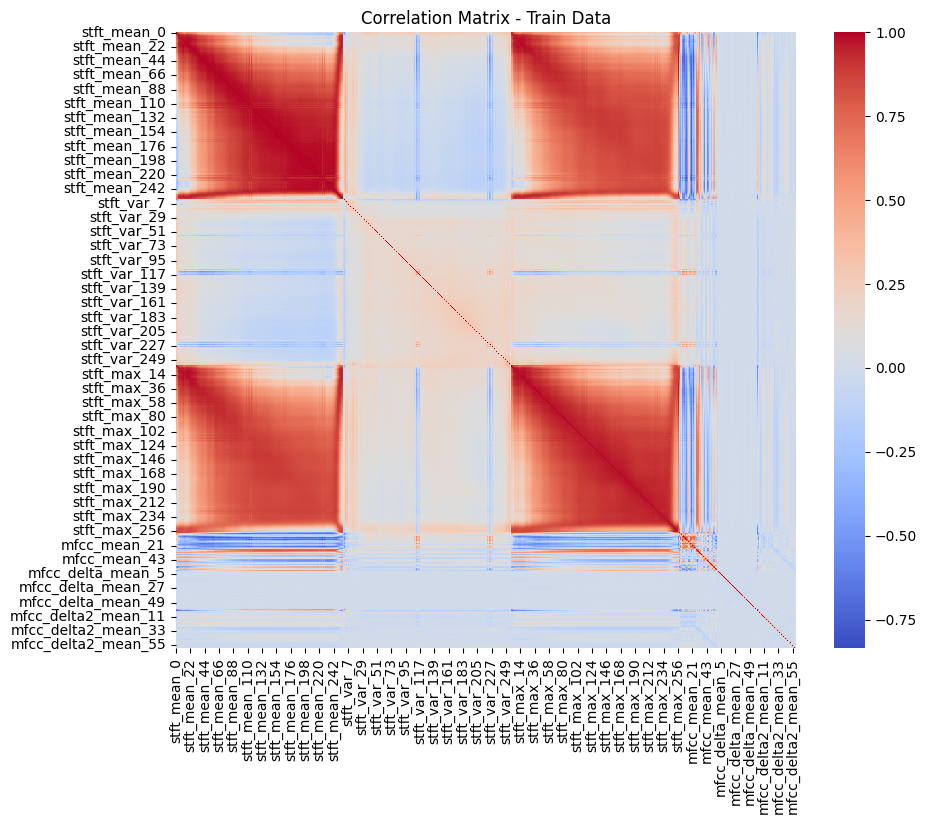

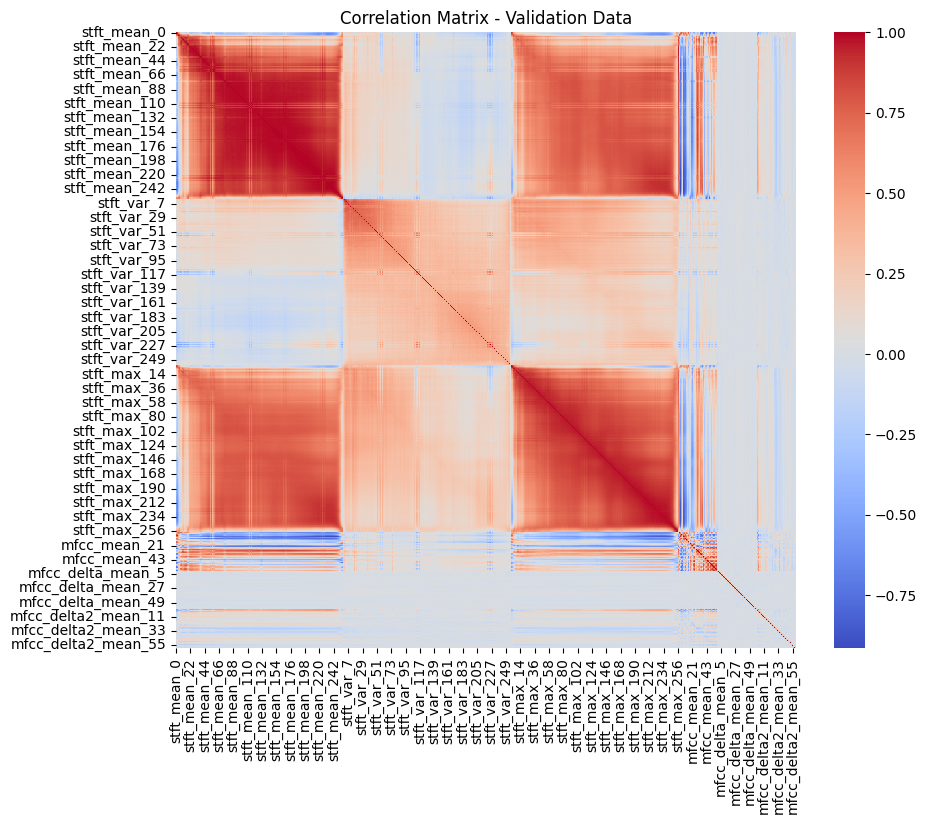

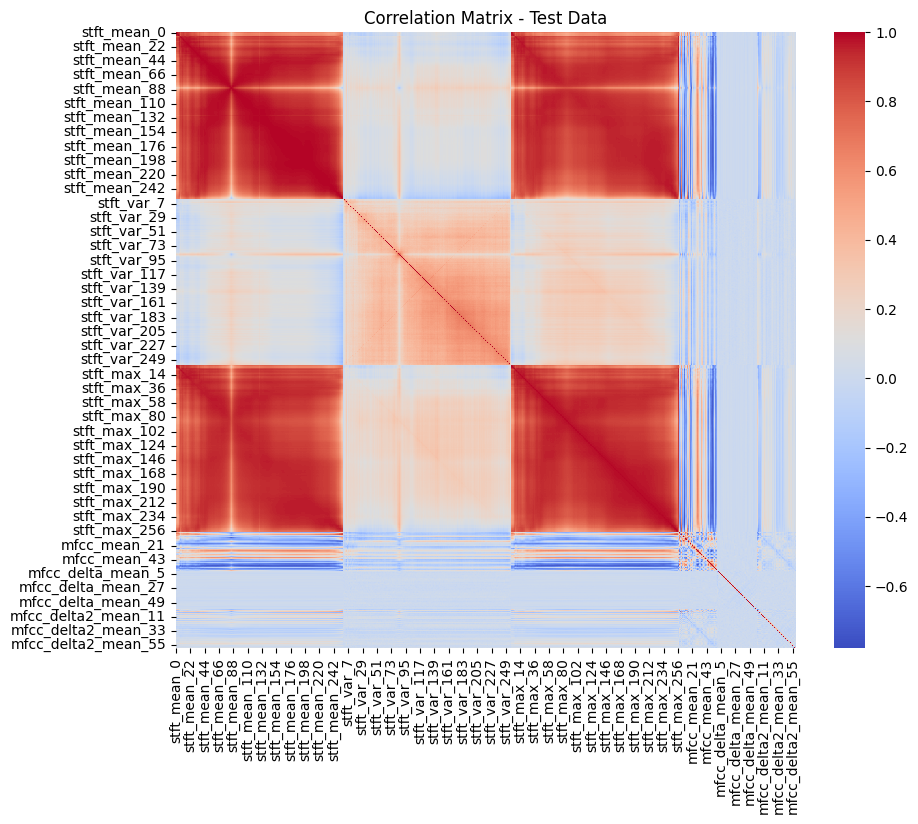

In [ ]:
# Vẽ heatmap cho tập Train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_train, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix - Train Data")
plt.show()

# Vẽ heatmap cho tập Validation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_val, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix - Validation Data")
plt.show()

# Vẽ heatmap cho tập Test
plt.figure(figsize=(10, 8))
sns.heatmap(corr_test, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix - Test Data")
plt.show()


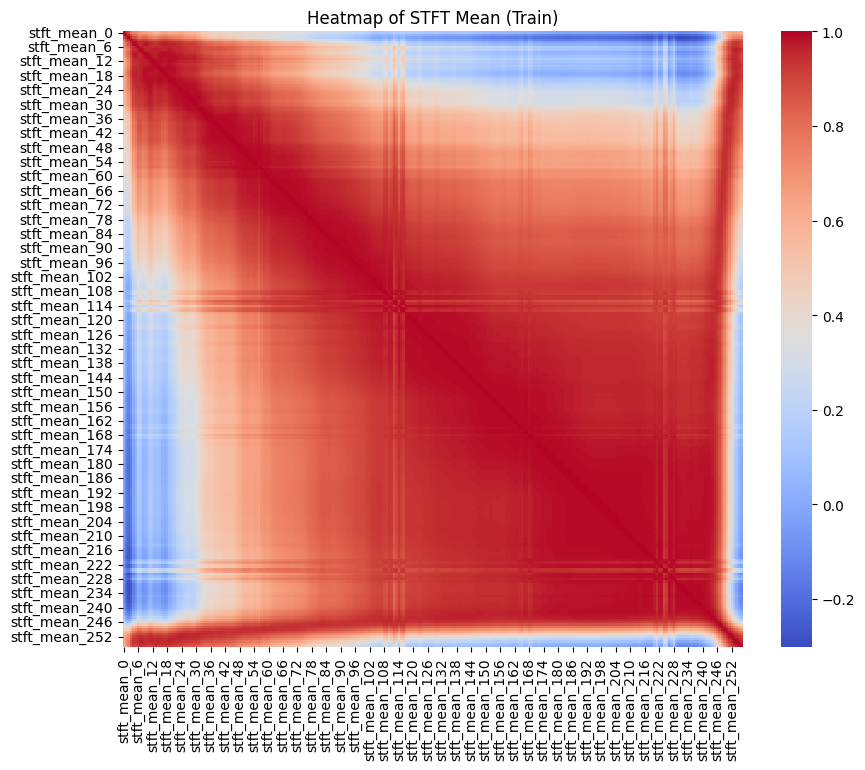

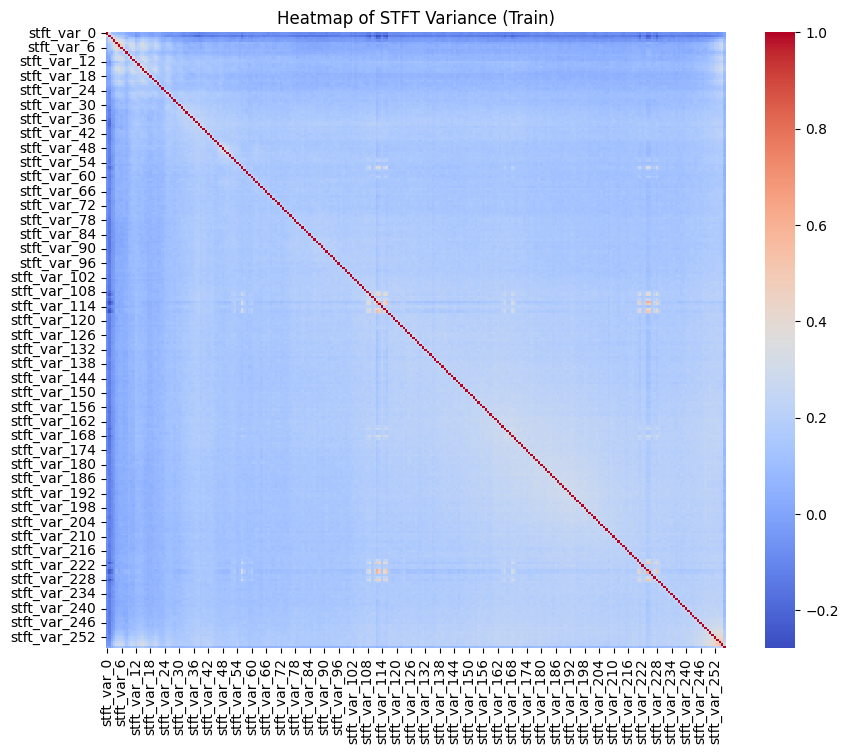

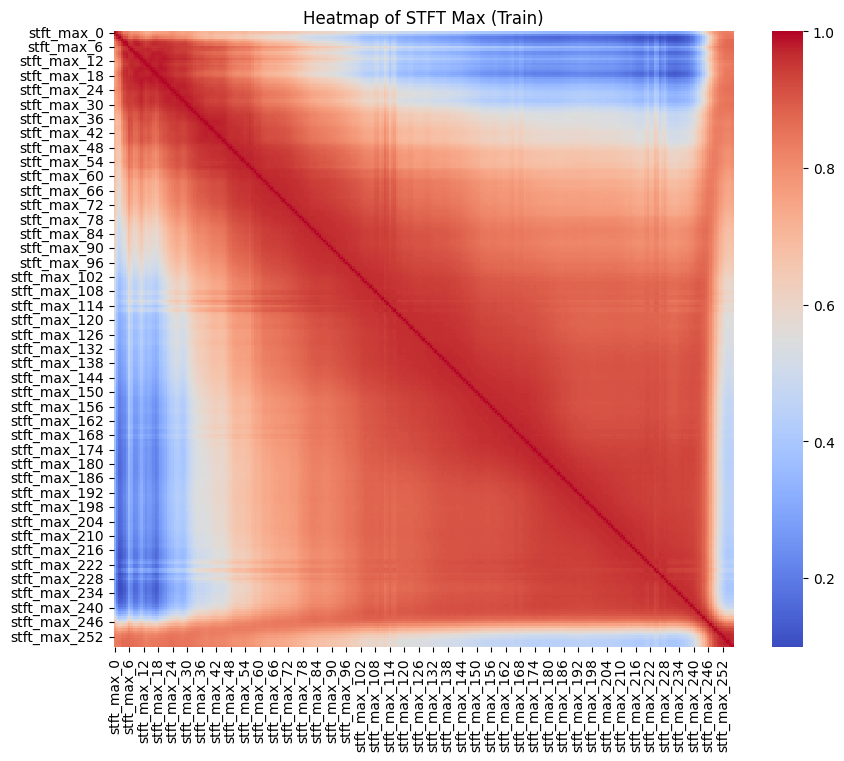

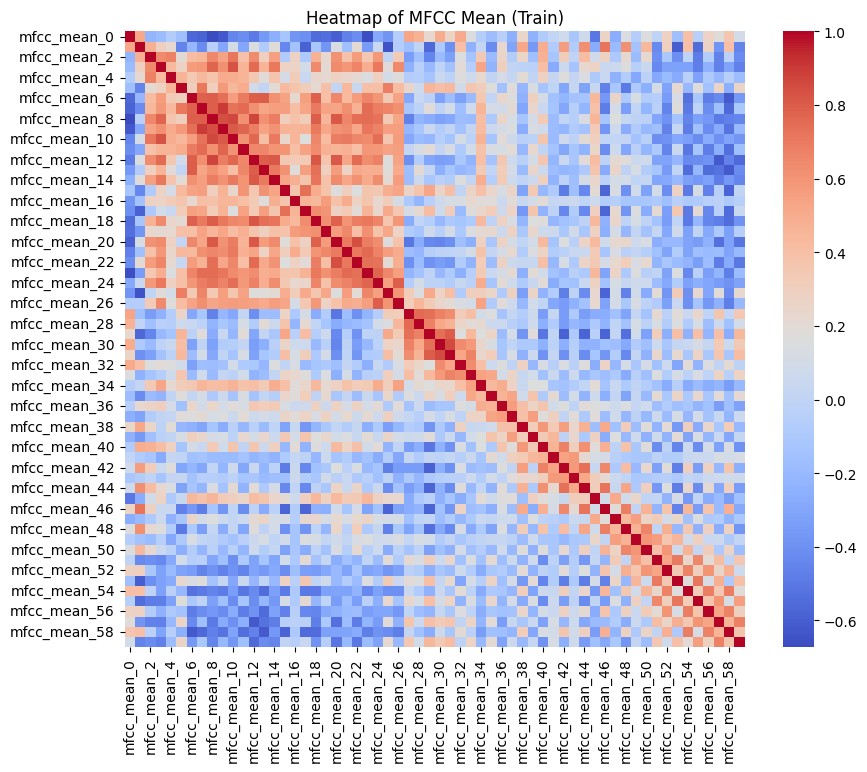

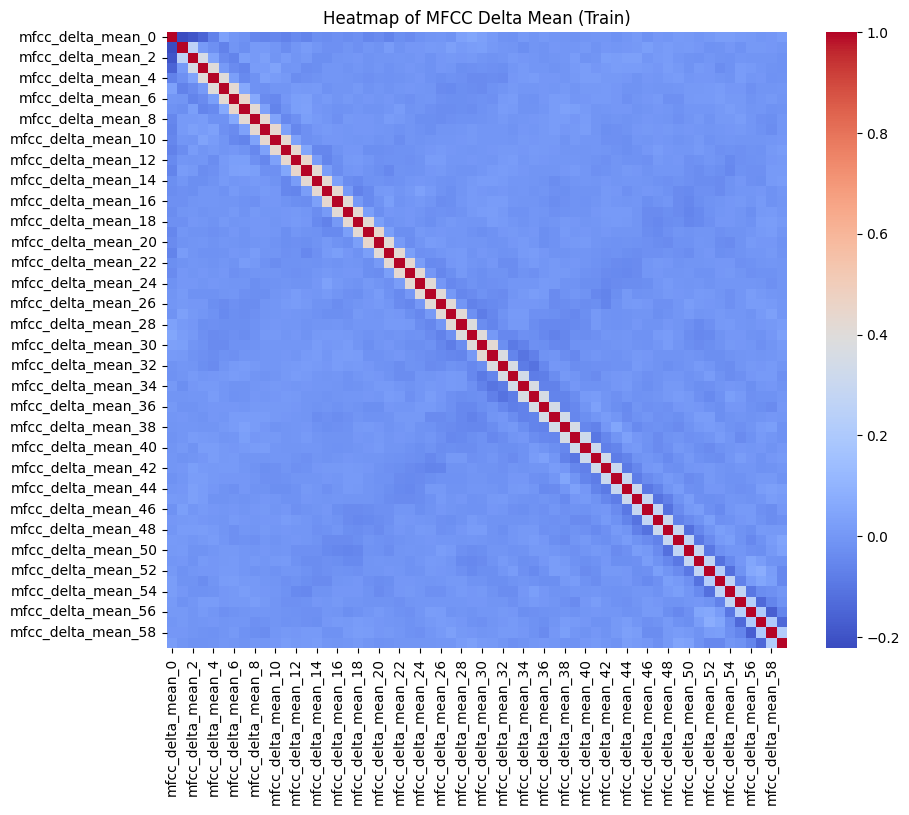

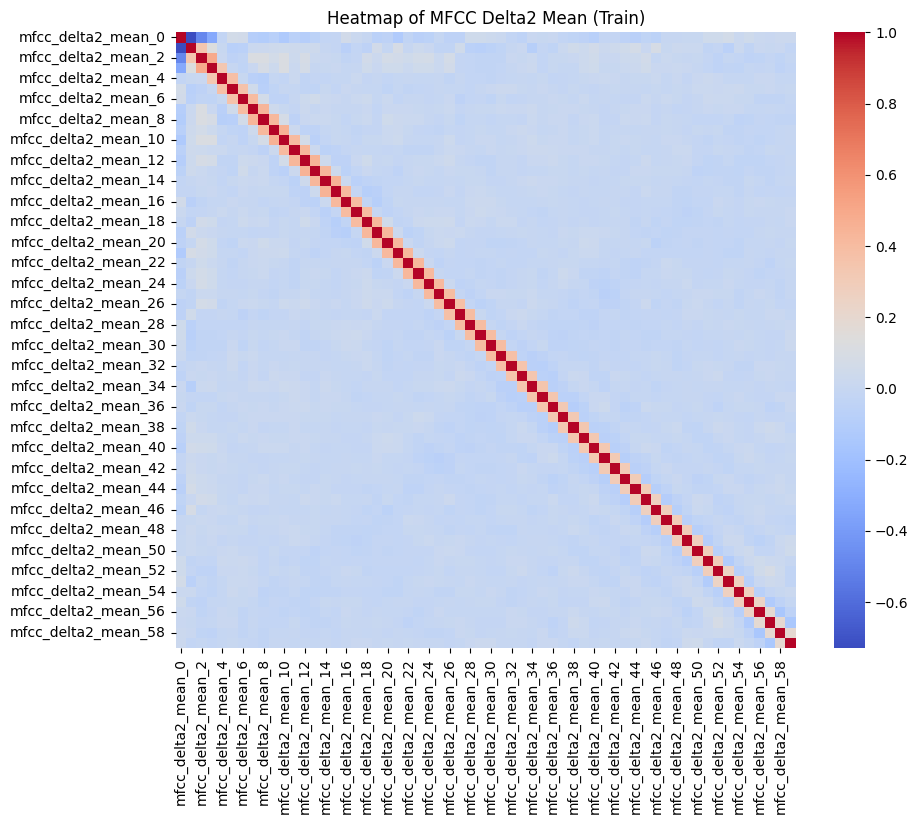

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Xác định chỉ số cột
stft_mean_end = 257
stft_var_end = stft_mean_end + 257
stft_max_end = stft_var_end + 257
mfcc_mean_end = stft_max_end + 60
mfcc_delta_end = mfcc_mean_end + 60
mfcc_delta2_end = mfcc_delta_end + 60

feature_groups = {
    "STFT Mean": (0, stft_mean_end),
    "STFT Variance": (stft_mean_end, stft_var_end),
    "STFT Max": (stft_var_end, stft_max_end),
    "MFCC Mean": (stft_max_end, mfcc_mean_end),
    "MFCC Delta Mean": (mfcc_mean_end, mfcc_delta_end),
    "MFCC Delta2 Mean": (mfcc_delta_end, mfcc_delta2_end),
}

# Vẽ heatmap cho từng nhóm
for feature_name, (start, end) in feature_groups.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(X_train_scaled.iloc[:, start:end].corr(), cmap='coolwarm', annot=False, fmt=".2f")
    plt.title(f"Heatmap of {feature_name} (Train)")
    plt.show()


                 Feature  Importance
215        stft_mean_215    0.060104
213        stft_mean_213    0.059936
218        stft_mean_218    0.049943
220        stft_mean_220    0.040698
235        stft_mean_235    0.039990
..                   ...         ...
402         stft_var_145    0.000000
403         stft_var_146    0.000000
404         stft_var_147    0.000000
405         stft_var_148    0.000000
950  mfcc_delta2_mean_59    0.000000

[951 rows x 2 columns]

Mean Importance: 0.001052
Max Importance: 0.060104
Median Importance: 0.000000


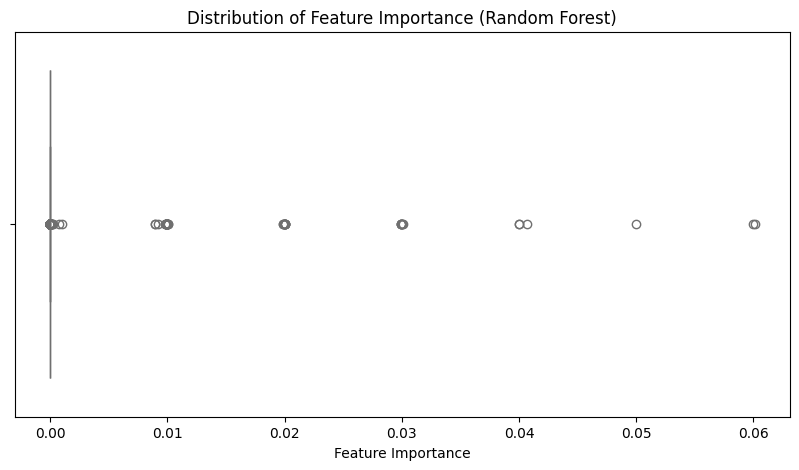

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Lấy feature importance
feature_importances = rf.feature_importances_

# Chuyển thành DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# In toàn bộ feature importance
print(feature_importance_df)

# Tính mean, max, median
importance_mean = feature_importance_df['Importance'].mean()
importance_max = feature_importance_df['Importance'].max()
importance_median = feature_importance_df['Importance'].median()

print(f"\nMean Importance: {importance_mean:.6f}")
print(f"Max Importance: {importance_max:.6f}")
print(f"Median Importance: {importance_median:.6f}")

# Vẽ Box Plot để xem phân bố
plt.figure(figsize=(10, 5))
sns.boxplot(x=feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Distribution of Feature Importance (Random Forest)")
plt.show()


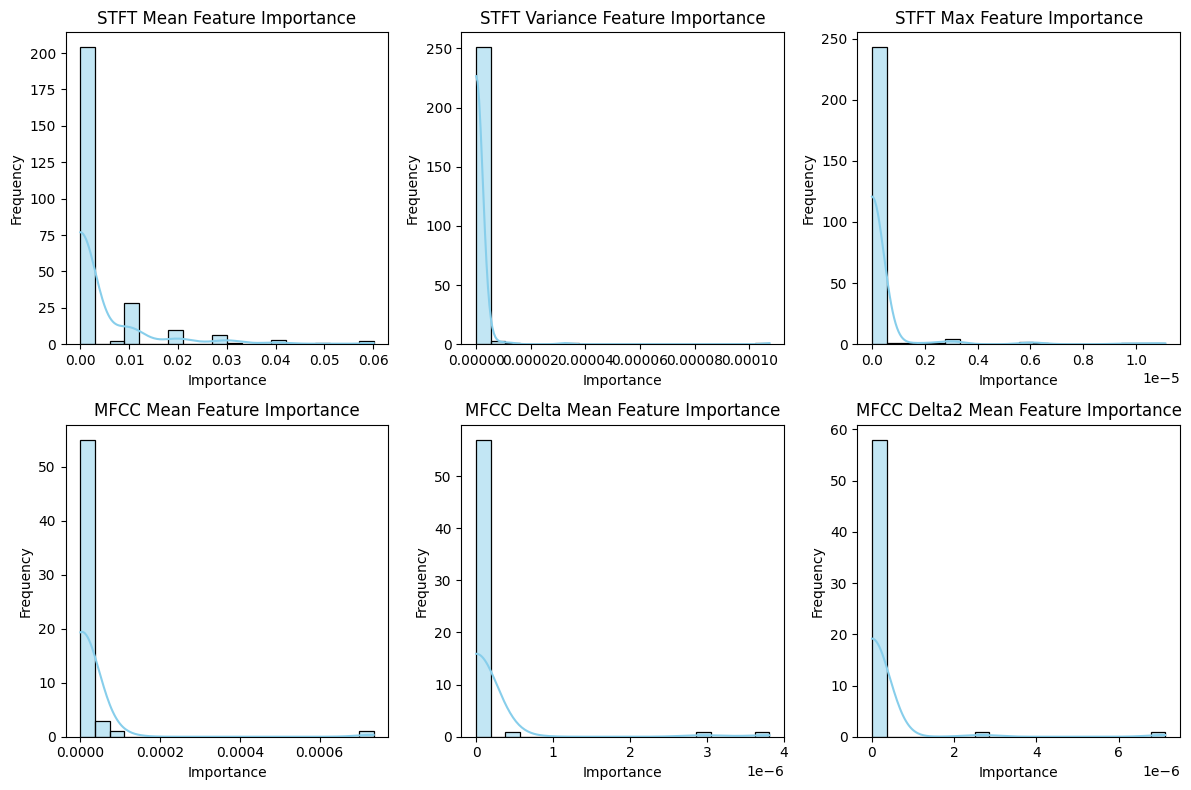

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo danh sách nhóm và từ khóa tương ứng
group_names = ["STFT Mean", "STFT Variance", "STFT Max", "MFCC Mean", "MFCC Delta Mean", "MFCC Delta2 Mean"]
group_filters = ["stft_mean", "stft_var", "stft_max", "mfcc_mean", "mfcc_delta_mean", "mfcc_delta2_mean"]

# Vẽ histogram cho từng nhóm
plt.figure(figsize=(12, 8))
for i, (group_name, filter_keyword) in enumerate(zip(group_names, group_filters), 1):
    group_df = feature_importance_df[feature_importance_df['Feature'].str.contains(filter_keyword, regex=False)]
    
    plt.subplot(2, 3, i)  # Chia thành 2 hàng, 3 cột
    sns.histplot(group_df['Importance'], bins=20, kde=True, color="skyblue")
    plt.title(f"{group_name} Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
zero_importance_features = feature_importance_df[feature_importance_df["Importance"] == 0]
num_zero_importance = len(zero_importance_features)

print(f"Số lượng feature có Importance = 0: {num_zero_importance}")
print(zero_importance_features)


Số lượng feature có Importance = 0: 768
                 Feature  Importance
656         stft_max_142         0.0
655         stft_max_141         0.0
654         stft_max_140         0.0
699         stft_max_185         0.0
710         stft_max_196         0.0
..                   ...         ...
402         stft_var_145         0.0
403         stft_var_146         0.0
404         stft_var_147         0.0
405         stft_var_148         0.0
950  mfcc_delta2_mean_59         0.0

[768 rows x 2 columns]


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train_scaled, y_train, discrete_features=False)

mi_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Mutual Information": mi_scores
}).sort_values(by="Mutual Information", ascending=False)

print(mi_df)


                 Feature  Mutual Information
20          stft_mean_20            0.693187
19          stft_mean_19            0.693187
16          stft_mean_16            0.693187
15          stft_mean_15            0.693187
14          stft_mean_14            0.693187
..                   ...                 ...
851   mfcc_delta_mean_20            0.000000
846   mfcc_delta_mean_15            0.000000
888   mfcc_delta_mean_57            0.000000
842   mfcc_delta_mean_11            0.000000
950  mfcc_delta2_mean_59            0.000000

[951 rows x 2 columns]


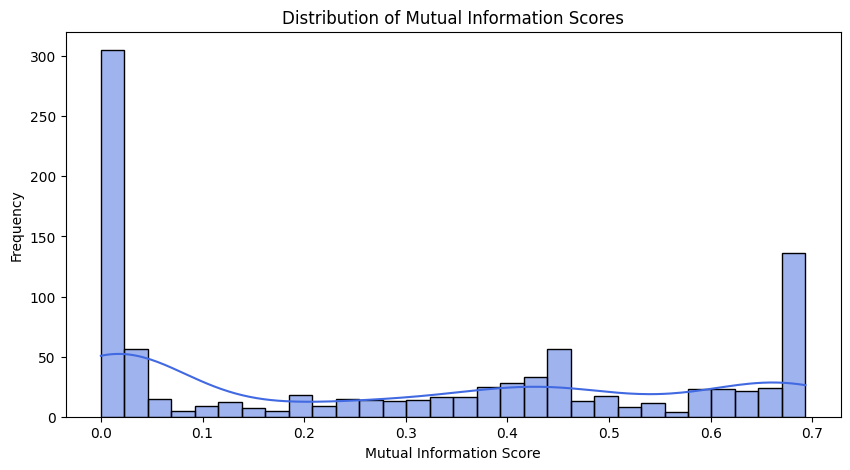

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

mi_scores = mutual_info_classif(X_train_scaled, y_train, discrete_features=False)

# Tạo DataFrame kết quả
mi_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Mutual Information": mi_scores
}).sort_values(by="Mutual Information", ascending=False)

# Vẽ biểu đồ histogram của MI scores
plt.figure(figsize=(10, 5))
sns.histplot(mi_df["Mutual Information"], bins=30, kde=True, color="royalblue")

# Thêm nhãn và tiêu đề
plt.xlabel("Mutual Information Score")
plt.ylabel("Frequency")
plt.title("Distribution of Mutual Information Scores")

# Hiển thị biểu đồ
plt.show()



In [ ]:
# Sắp xếp MI theo giá trị giảm dần
mi_df_sorted = mi_df.sort_values(by="Mutual Information", ascending=False)

# In danh sách feature theo thứ tự MI giảm dần
for feature, score in zip(mi_df_sorted["Feature"], mi_df_sorted["Mutual Information"]):
    print(f"{feature}: {score:.6f}")


stft_mean_20: 0.693187
stft_mean_19: 0.693187
stft_mean_16: 0.693187
stft_mean_15: 0.693187
stft_mean_14: 0.693187
stft_mean_26: 0.693187
stft_mean_10: 0.693187
stft_mean_27: 0.693141
stft_mean_22: 0.693085
stft_mean_23: 0.693073
stft_mean_13: 0.693025
stft_mean_21: 0.692870
stft_mean_28: 0.692863
stft_mean_18: 0.692829
stft_mean_29: 0.692683
stft_mean_17: 0.692549
stft_mean_228: 0.692130
mfcc_mean_0: 0.692059
stft_mean_30: 0.691974
stft_mean_207: 0.691859
stft_mean_225: 0.691818
stft_mean_12: 0.691538
stft_mean_25: 0.691506
stft_mean_208: 0.691483
stft_mean_220: 0.690925
stft_mean_206: 0.690924
stft_mean_214: 0.690924
stft_mean_215: 0.690923
stft_mean_211: 0.690922
stft_mean_227: 0.690881
stft_mean_235: 0.690860
stft_mean_212: 0.690836
stft_mean_213: 0.690790
stft_mean_224: 0.690771
stft_mean_229: 0.690691
stft_mean_209: 0.690647
stft_mean_24: 0.690511
stft_mean_216: 0.690403
stft_mean_221: 0.690310
stft_mean_210: 0.690268
stft_mean_9: 0.690255
stft_max_15: 0.690151
stft_mean_222: 0.6

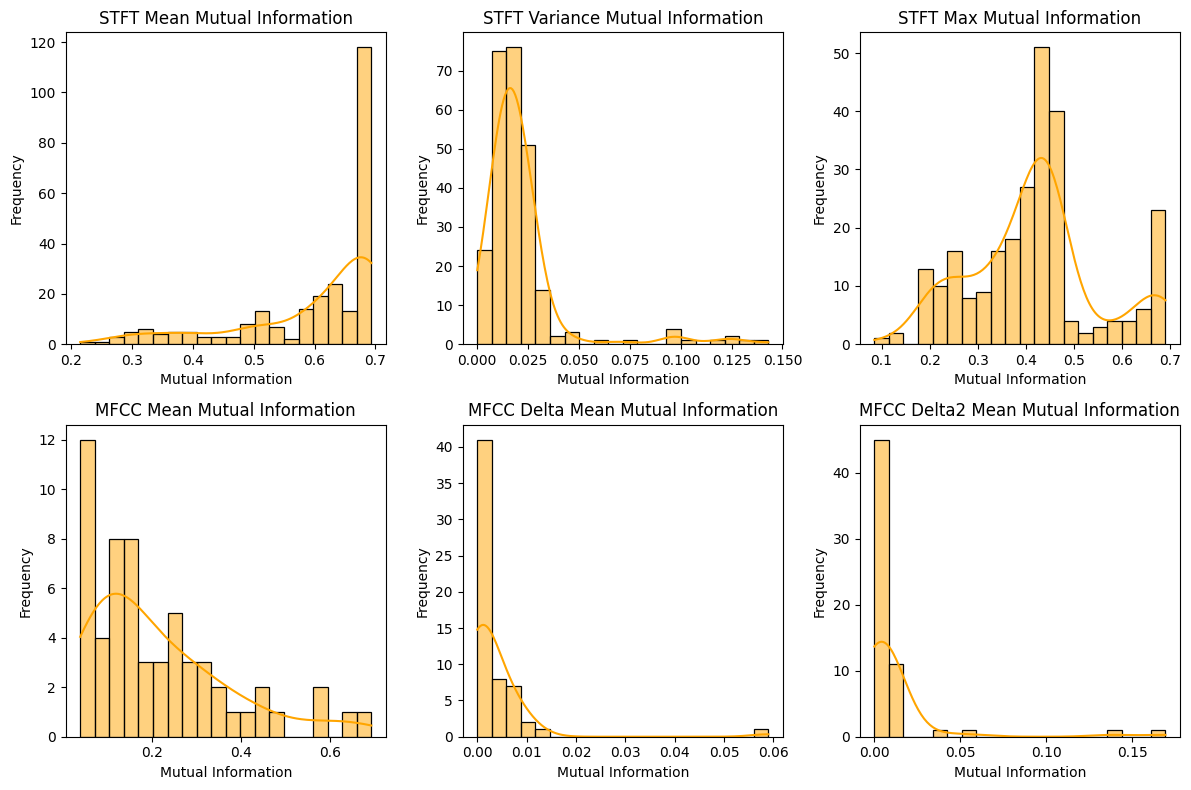

In [ ]:
plt.figure(figsize=(12, 8))
for i, (group_name, filter_keyword) in enumerate(zip(group_names, group_filters), 1):
    group_df = mi_df[mi_df['Feature'].str.contains(filter_keyword, regex=False)]
    
    plt.subplot(2, 3, i)  # Chia thành 2 hàng, 3 cột
    sns.histplot(group_df['Mutual Information'], bins=20, kde=True, color="orange")
    plt.title(f"{group_name} Mutual Information")
    plt.xlabel("Mutual Information")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lọc các cột có importance score = 0
zero_importance_features = feature_importance_df[feature_importance_df["Importance"] == 0]["Feature"].values
X_zero_importance = X_train_scaled[zero_importance_features]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_zero_importance_scaled = scaler.fit_transform(X_zero_importance)

# Áp dụng PCA với 5 thành phần
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_zero_importance_scaled)

# Chuyển thành DataFrame và đặt tên cột
pca_columns = [f"PCA_{i+1}" for i in range(5)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Ghép vào DataFrame gốc (bỏ các cột có importance = 0)
X_train_reduced = X_train_scaled.drop(columns=zero_importance_features).reset_index(drop=True)
X_train_reduced = pd.concat([X_train_reduced, X_pca_df], axis=1)

# In kết quả
print(f"Số lượng cột ban đầu: {X_train_scaled.shape[1]}")
print(f"Số lượng cột sau khi giảm: {X_train_reduced.shape[1]}")
print(f"Các cột PCA mới: {pca_columns}")


Số lượng cột ban đầu: 951
Số lượng cột sau khi giảm: 188
Các cột PCA mới: ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']


In [ ]:
# Xử lý tập validation
X_zero_importance_val = X_val_scaled[zero_importance_features]
X_zero_importance_val_scaled = scaler.transform(X_zero_importance_val)  # Dùng scaler đã fit từ train

X_pca_val = pca.transform(X_zero_importance_val_scaled)  # Dùng PCA đã fit từ train
X_pca_val_df = pd.DataFrame(X_pca_val, columns=pca_columns)

# Ghép lại với X_val_scaled (bỏ các cột importance = 0)
X_val_reduced = X_val_scaled.drop(columns=zero_importance_features).reset_index(drop=True)
X_val_reduced = pd.concat([X_val_reduced, X_pca_val_df], axis=1)


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_val_reduced)
    
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average="weighted")

    results[name] = {"Accuracy": acc, "F1-score": f1}